# Imports

In [1]:
import sys 
import os
sys.path.append(os.path.join(os.getcwd(), '../Code/'))

In [2]:
from DataSets.Ladicky import LadickyDataset

In [3]:
from Models.VGG16 import VGG16

Using TensorFlow backend.


In [4]:
import tensorflow as tf

In [5]:
import numpy as np

In [6]:
from PIL import Image

# Utility Function

In [7]:
def show_normals(npnorms):
    return Image.fromarray(((npnorms+1)/2*255).astype(np.uint8))

# Load data

In [8]:
file = '../Data/LadickyDataset10.mat'

In [9]:
dataset = LadickyDataset(file)

In [10]:
dataset.size

10

# Loss Function

In [11]:
def mean_dot_product(y_true, y_pred):
    dot = tf.einsum('ijkl,ijkl->ijk', y_true, y_pred) # Dot product
    n = tf.cast(tf.count_nonzero(dot),tf.float32)
    mean = tf.reduce_sum(dot) / n
    return -1 * mean

# Testing

In [66]:
model = VGG16(weights=None)
imnetmodel1 = VGG16()
imnetmodel2 = VGG16()

In [67]:
# Compile model
model.compile(loss= mean_dot_product, optimizer='sgd')

In [63]:
model.layers[17].get_weights()

[array([[[[  2.97863223e-03,   1.28228441e-02,   2.28409469e-02, ...,
            -1.64264236e-02,  -2.06242874e-03,  -1.41646732e-02],
          [ -1.46831293e-02,  -7.01227412e-03,  -2.22474448e-02, ...,
             1.48497596e-02,   2.34740488e-02,  -8.31191428e-03],
          [  1.17747299e-03,   4.57974151e-04,  -1.33952545e-02, ...,
             7.44706392e-03,  -1.16428109e-02,  -8.69392045e-03],
          ..., 
          [  6.40907139e-03,  -1.83722563e-02,   2.06986256e-03, ...,
            -2.18210686e-02,  -2.33048629e-02,  -1.82466954e-02],
          [  1.72219165e-02,   1.34307928e-02,  -2.29290444e-02, ...,
            -1.22297956e-02,   3.62585485e-03,  -1.43011119e-02],
          [ -2.17402689e-02,   1.00728981e-02,  -2.15632841e-02, ...,
             2.34434903e-02,  -2.16306467e-02,  -4.82864678e-03]],
 
         [[  6.60762191e-03,   6.80020079e-03,   1.40808038e-02, ...,
             1.32532977e-03,   4.04108129e-03,  -1.60943437e-02],
          [  1.16630457e-02, 

In [64]:
imnetmodel1.layers[17].get_weights()

[array([[[[  4.07882966e-04,   4.82621184e-03,  -9.11695044e-03, ...,
             1.51569908e-02,  -2.73966836e-03,  -4.83311387e-03],
          [  3.48924054e-03,   2.60589737e-03,  -8.10198858e-03, ...,
             8.86987546e-04,  -7.08238874e-03,  -7.96321197e-04],
          [ -1.12759033e-02,  -6.43836753e-03,  -8.05236772e-03, ...,
             1.90410519e-03,   3.87627119e-03,   1.96338408e-02],
          ..., 
          [ -1.49949323e-02,   1.20318262e-02,   9.87236737e-04, ...,
            -2.89861043e-03,   4.03315574e-03,  -5.93429338e-03],
          [ -7.53336679e-03,   6.08530594e-03,   9.90014290e-04, ...,
             1.63243050e-04,  -3.09621776e-03,  -3.01808352e-03],
          [ -2.62522907e-03,   3.51887429e-03,  -2.58309790e-03, ...,
            -6.02027494e-03,  -8.85035843e-03,   9.85825085e-04]],
 
         [[  3.02846078e-04,   2.64736195e-03,  -1.37099335e-02, ...,
             1.49135189e-02,  -4.65666235e-04,  -6.84898719e-03],
          [ -9.60117579e-03, 

In [65]:
imnetmodel2.layers[17].get_weights()

[array([[[[  4.07882966e-04,   4.82621184e-03,  -9.11695044e-03, ...,
             1.51569908e-02,  -2.73966836e-03,  -4.83311387e-03],
          [  3.48924054e-03,   2.60589737e-03,  -8.10198858e-03, ...,
             8.86987546e-04,  -7.08238874e-03,  -7.96321197e-04],
          [ -1.12759033e-02,  -6.43836753e-03,  -8.05236772e-03, ...,
             1.90410519e-03,   3.87627119e-03,   1.96338408e-02],
          ..., 
          [ -1.49949323e-02,   1.20318262e-02,   9.87236737e-04, ...,
            -2.89861043e-03,   4.03315574e-03,  -5.93429338e-03],
          [ -7.53336679e-03,   6.08530594e-03,   9.90014290e-04, ...,
             1.63243050e-04,  -3.09621776e-03,  -3.01808352e-03],
          [ -2.62522907e-03,   3.51887429e-03,  -2.58309790e-03, ...,
            -6.02027494e-03,  -8.85035843e-03,   9.85825085e-04]],
 
         [[  3.02846078e-04,   2.64736195e-03,  -1.37099335e-02, ...,
             1.49135189e-02,  -4.65666235e-04,  -6.84898719e-03],
          [ -9.60117579e-03, 

In [68]:
# Variables
images = np.empty([dataset.size, dataset.batch_height, dataset.batch_width, 3], dtype=np.float32)
normals = np.empty([dataset.size, dataset.batch_height, dataset.batch_width, 3], dtype=np.float32)
preds = np.empty([dataset.size, dataset.batch_height, dataset.batch_width, 3], dtype=np.float32)

In [73]:
for i in range(dataset.size):
        images[i], normals[i] = dataset.get_data(i)

In [83]:
for i in range(25):
    model.train_on_batch(images,normals)

In [79]:
# Prediction
for i in range(dataset.size):
        print('Index: '+str(i))
        preds[i] = model.predict_on_batch(images[i].reshape((1,dataset.batch_height, dataset.batch_width, 3 )))

Index: 0
Index: 1
Index: 2
Index: 3
Index: 4
Index: 5
Index: 6
Index: 7
Index: 8
Index: 9


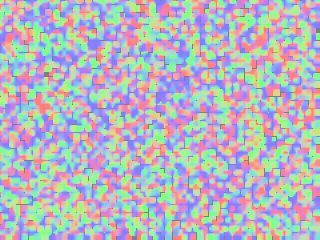

In [80]:
show_normals(preds[1])

# Code

In [71]:
%%writefile ../Code/Models/VGG16.py
"""Model based on VGG16:

# Reference

- [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)

"""

import warnings

import tensorflow as tf

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Reshape
from keras.layers import Lambda
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils.data_utils import get_file



WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'


def VGG16(weights='imagenet',
          input_shape=(240, 320, 3)):
    """Instantiates the VGG16-based architecture.

    Optionally loads weights pre-trained
    on ImageNet. Note that when using TensorFlow,
    for best performance you should set
    `image_data_format='channels_last'` in your Keras config
    at ~/.keras/keras.json.

    # Arguments
        weights: one of `None` (random initialization)
            or 'imagenet' (pre-training on ImageNet).
        input_shape: optional shape tuple,
            It should have exactly 3 input channels,
            and width and height should be no smaller than 48.
            E.g. `(200, 200, 3)` would be one valid value.

    # Returns
        A Keras model instance.

    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
    """
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')


    img_input = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    # Top Layers
    x = Flatten()(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(80*60*3, activation='relu', name='fc2')(x)
    x = Reshape((60,80,3))(x)
    x = Lambda(lambda x: tf.image.resize_bilinear(x , [240,320]) )(x)
    x = Lambda(lambda x: tf.nn.l2_normalize(x, 3) )(x)
    
    # Create model.
    inputs = img_input
    model = Model(inputs, x, name='vgg16')

    # load weights
    if weights == 'imagenet':
        weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                WEIGHTS_PATH_NO_TOP,
                                cache_subdir='models')
        model.load_weights(weights_path, by_name=True)
    
    return model


Overwriting ../Code/Models/VGG16.py
